# Milestone 1 - EDA and Preprocessing data 

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaing the data
- Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR) 
- Observe duplicate data
- Observe outliers
- After observing outliers,missing data and duplicates, handle any unclean data.
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
- Add a new column named 'Week number' and discretisize the data into weeks according to the dates.Tip: Change the datatype of the date feature to datetime type instead of object.
- Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
- Identify feature(s) which need normalisation and show your reasoning.Then choose a technique to normalise the feature(s) and comment on why you chose this technique.
- Add atleast two more columns which adds more info to the dataset by evaluating specific feature(s). I.E( Column indicating whether the accident was on a weekend or not). 
- For any imputation with arbitrary values or encoding done, you have to store what the value imputed or encoded represents in a new csv file. I.e if you impute a missing value with -1 or 100 you must have a csv file illustrating what -1 and 100 means. Or for instance, if you encode cities with 1,2,3,4,etc what each number represents must be shown in the new csv file.
- Load the new dataset into a csv file.
- **Extremely Important note** - Your code should be as generic as possible and not hard-coded and be able to work with various datasets. Any hard-coded solutions will be severely penalised.
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import datetime
import math

In [3]:
df= pd.read_csv('C:\\Users\\Eng Ahmed\\Desktop\\DE\\Project Dataset\\2007_Accidents_UK.csv',index_col=0)
pd.set_option('display.max_columns',70)
df


C:\Users\Eng Ahmed\AppData\Local\Temp\ipykernel_13012\4115206287.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('C:\\Users\\Eng Ahmed\\Desktop\\DE\\Project Dataset\\2007_Accidents_UK.csv',index_col=0)


,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200701BS64157,2007,01BS64157,524390.0,180110.0,-0.209082,51.506187,Metropolitan Police,Serious,2,1,05/06/2007,Tuesday,21:35,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,402,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002871
200701BS65737,2007,01BS65737,526880.0,178930.0,-0.173647,51.495029,Metropolitan Police,Serious,2,1,02/07/2007,Monday,18:41,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3218,Single carriageway,30.0,Crossroads,Auto traffic signal,C,first_road_class is C or Unclassified. These r...,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002821
200701BS66127,2007,01BS66127,524280.0,181390.0,-0.210215,51.517715,Metropolitan Police,Serious,3,1,26/08/2007,Sunday,00:50,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,40,NaN,50.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lighting unknown,NaN,Dry,None,None,Urban,Yes,Non-trunk,E01002878
200701BS66128,2007,01BS66128,524860.0,178930.0,-0.202731,51.495478,Metropolitan Police,Serious,4,1,16/08/2007,Thursday,08:58,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,314,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002817
200701BS66837,2007,01BS66837,525590.0,178180.0,-0.192487,51.488576,Metropolitan Police,Slight,2,1,03/09/2007,Monday,21:17,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,3218,NaN,30.0,Crossroads,Auto traffic signal,A,3220.0,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,NaN,Dry,None,None,Urban,Yes,Non-trunk,E01002894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007984154707,2007,984154707,322650.0,566300.0,-3.210294,54.985289,Dumfries and Galloway,Slight,1,1,20/12/2007,Thursday,22:01,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,B,721,Single carriageway,60.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Other,Frost or ice,None,None,Rural,Yes,Data missing or out of range,-1
2007984154807,2007,984154807,323710.0,566150.0,-3.193693,54.984105,Dumfries and Galloway,Serious,1,2,21/12/2007,Friday,13:12,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,B,721,Single carriageway,40.0,Not at junction or within 20 metres,Data missing or out of range,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Other,Frost or ice,None,None,Rural,Yes,Data missing or ou

# 2- EDA

In [4]:
df["second_road_class"].value_counts() #-1 missing value

-1              77703
Unclassified    71301
A               17103
C                8054
B                6701
Motorway         1130
A(M)              123
Name: second_road_class, dtype: int64

In [5]:
df.isnull().sum()

accident_year                                      0
accident_reference                                 0
location_easting_osgr                             15
location_northing_osgr                            15
longitude                                         15
latitude                                          15
police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
date                                               0
day_of_week                                        0
time                                               0
local_authority_district                           0
local_authority_ons_district                       0
local_authority_highway                            0
first_road_class                                   0
first_road_number                                  0
road_type                                     

In [6]:
df["road_surface_conditions"].value_counts()

Dry                             125348
Wet or damp                      53153
Frost or ice                      2569
Snow                               534
Flood over 3cm. deep               312
Data missing or out of range       199
Name: road_surface_conditions, dtype: int64

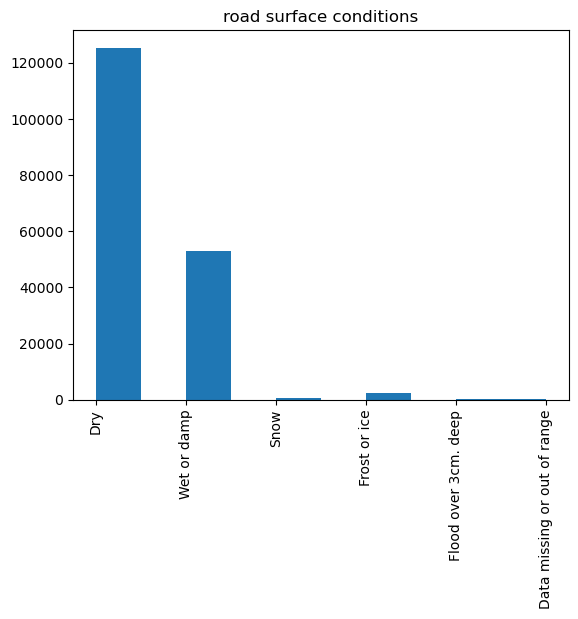

In [7]:
plt.hist(df.road_surface_conditions)
plt.title('road surface conditions')
plt.xticks(rotation=90)
plt.show()

In [8]:
df["number_of_casualties"].sum() #How many casualties ?

247780

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


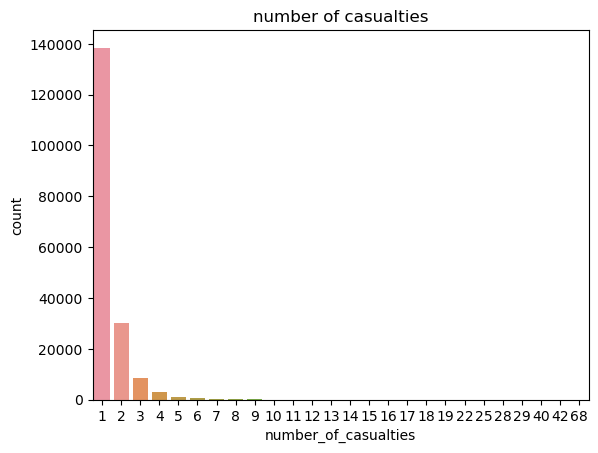

In [9]:
sns.countplot('number_of_casualties',data=df)
plt.title('number of casualties')
plt.show()

In [10]:
df["urban_or_rural_area"].value_counts()

Urban          114542
Rural           67558
Unallocated        15
Name: urban_or_rural_area, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


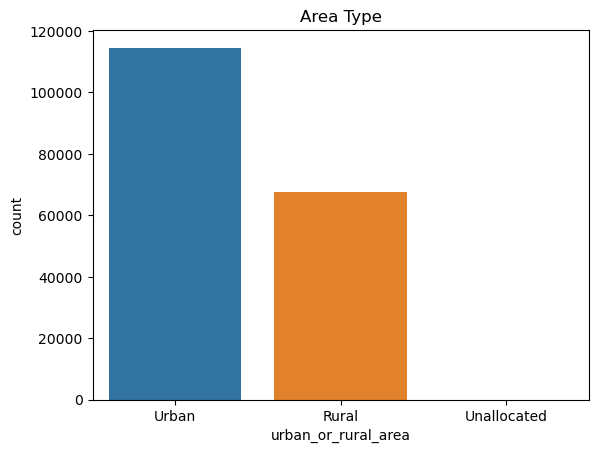

In [11]:
sns.countplot('urban_or_rural_area',data=df)
plt.title('Area Type')
plt.show()

In [12]:
df["number_of_vehicles"].sum()  #How many cars had accident?

334966

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


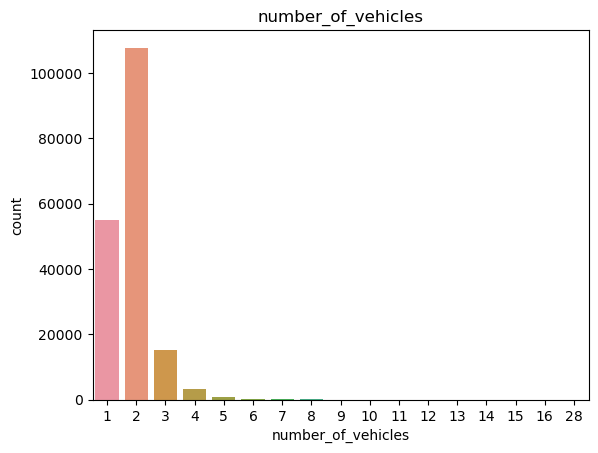

In [13]:
sns.countplot('number_of_vehicles',data=df)
plt.title('number_of_vehicles')
plt.show()

In [14]:
df["weather_conditions"].value_counts()

Fine no high winds              143876
Raining no high winds            22835
Other                             4083
Raining + high winds              2959
Fine + high winds                 2545
Fog or mist                        857
Snowing no high winds              680
Snowing + high winds               146
Data missing or out of range        19
Name: weather_conditions, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


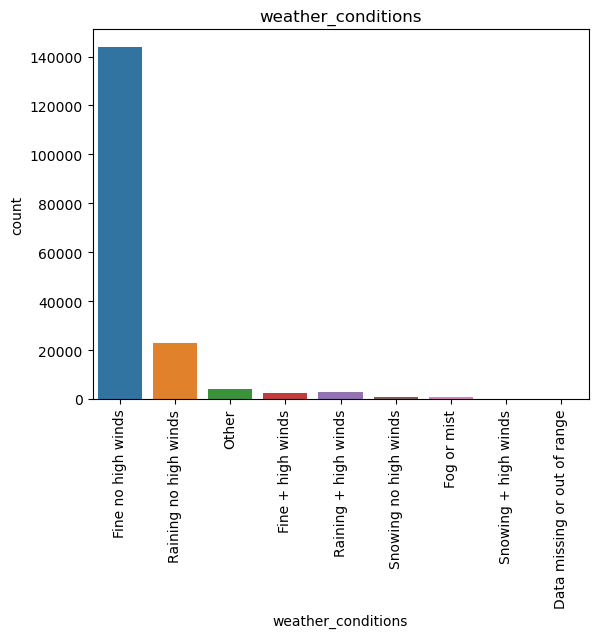

In [15]:
sns.countplot('weather_conditions',data=df)
plt.xticks(rotation=90)
plt.title('weather_conditions')
plt.show()

In [16]:
df["accident_year"].value_counts()

2007    182115
Name: accident_year, dtype: int64

In [17]:
df["police_force"].value_counts()

Metropolitan Police      22924
West Midlands             8546
Greater Manchester        7639
West Yorkshire            6867
Thames Valley             6837
Devon and Cornwall        5687
Hampshire                 5561
Kent                      5391
Strathclyde               5357
Lancashire                5247
Sussex                    5107
Avon and Somerset         5042
Essex                     5004
Surrey                    4272
South Yorkshire           4245
Northumbria               4181
Staffordshire             3956
Merseyside                3831
Nottinghamshire           3655
Hertfordshire             3587
South Wales               3572
Cheshire                  3545
West Mercia               3335
Derbyshire                3279
Leicestershire            2913
Cambridgeshire            2888
Humberside                2722
North Yorkshire           2610
Lothian and Borders       2511
Lincolnshire              2462
Norfolk                   2411
Dorset                    2327
Suffolk 

In [18]:
df["accident_severity"].value_counts()

Slight     155079
Serious     24322
Fatal        2714
Name: accident_severity, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


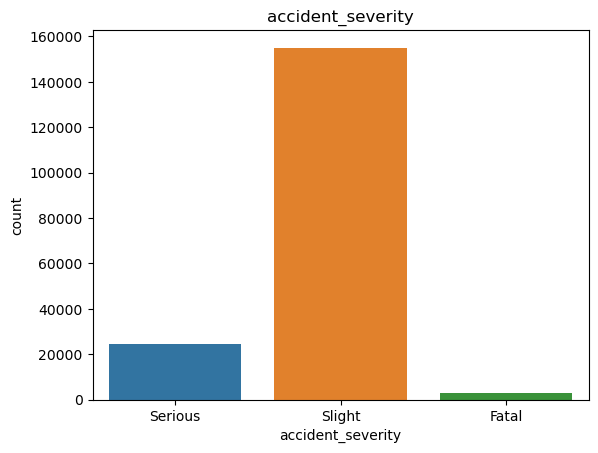

In [19]:
sns.countplot('accident_severity',data=df)

plt.title('accident_severity')
plt.show()

In [20]:
fatalAcc = df[df["accident_severity"] == 'Fatal']
res = fatalAcc.urban_or_rural_area.value_counts()
res

Rural    1773
Urban     941
Name: urban_or_rural_area, dtype: int64

C:\Users\Eng Ahmed\AppData\Local\Temp\ipykernel_13012\351773216.py:2: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(integer=True)


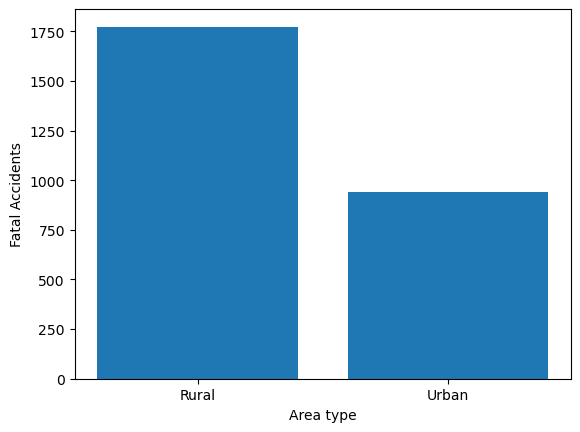

In [21]:
bar_plot = plt.bar(res.index,res)
plt.locator_params(integer=True)
plt.xlabel('Area type')
plt.ylabel('Fatal Accidents')
plt.show()

In [22]:
SeriousAcc = df[df["accident_severity"] == 'Serious']
res = SeriousAcc.urban_or_rural_area.value_counts()
res

Urban          14011
Rural          10310
Unallocated        1
Name: urban_or_rural_area, dtype: int64

C:\Users\Eng Ahmed\AppData\Local\Temp\ipykernel_13012\3626152781.py:2: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(integer=True)


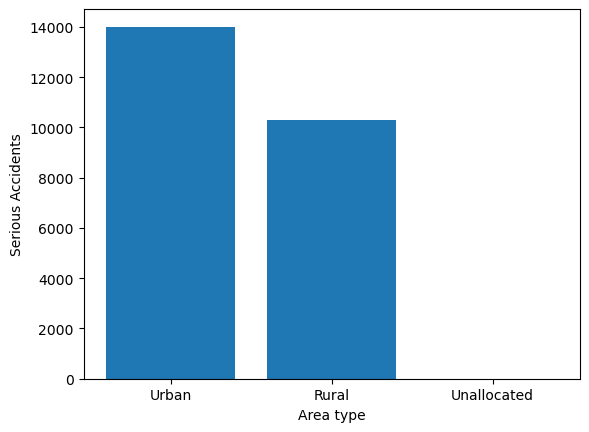

In [23]:
bar_plot = plt.bar(res.index,res)
plt.locator_params(integer=True)
plt.xlabel('Area type')
plt.ylabel('Serious Accidents')
plt.show()

In [24]:
SlightAcc = df[df["accident_severity"] == 'Slight']
res = SlightAcc.urban_or_rural_area.value_counts()
res

Urban          99590
Rural          55475
Unallocated       14
Name: urban_or_rural_area, dtype: int64

C:\Users\Eng Ahmed\AppData\Local\Temp\ipykernel_13012\1295000789.py:2: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(integer=True)


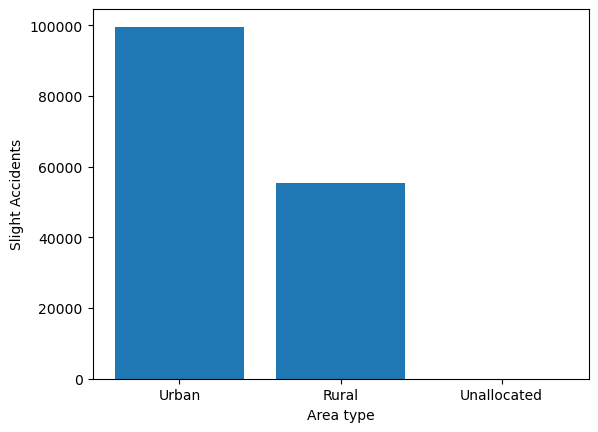

In [25]:
bar_plot = plt.bar(res.index,res)
plt.locator_params(integer=True)
plt.xlabel('Area type')
plt.ylabel('Slight Accidents')
plt.show()

In [26]:
SlightAccSev = df[df["accident_severity"] == 'Slight']
res = SlightAccSev.number_of_casualties.sum()
res

206333

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


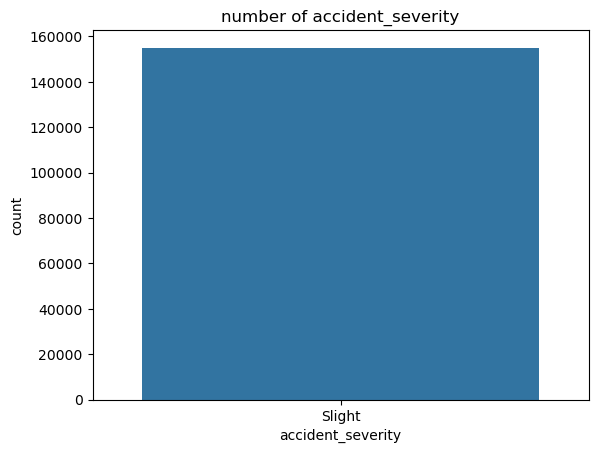

In [27]:
sns.countplot('accident_severity',data=df[df["accident_severity"] == 'Slight'])
plt.title('number of accident_severity')
plt.show()

In [28]:
FatalAccSev = df[df["accident_severity"] == 'Fatal']
res = FatalAccSev.number_of_casualties.sum()
res

5351

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


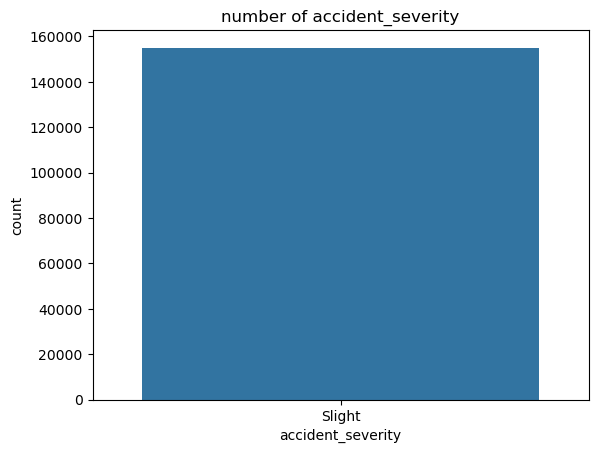

In [29]:
sns.countplot('accident_severity',data=df[df["accident_severity"] == 'Slight'])
plt.title('number of accident_severity')
plt.show()

In [30]:
SeriousAccSev = df[df["accident_severity"] == 'Serious']
res = SeriousAccSev.number_of_casualties.sum()
res

36096

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


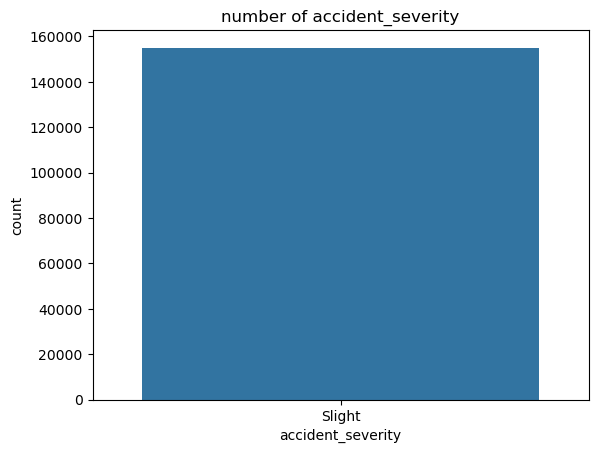

In [31]:
sns.countplot('accident_severity',data=df[df["accident_severity"] == 'Slight'])
plt.title('number of accident_severity')
plt.show()

In [32]:
roadSev = df[df["urban_or_rural_area"] == 'Urban']
res = roadSev.number_of_casualties.sum()
res

147444

In [33]:
roadSev = df[df["urban_or_rural_area"] == 'Rural']
res = roadSev.number_of_casualties.sum()
res

100320

# 3 - Cleaning Data

## Observing Missing and duplicate Data

In [34]:
df.isnull().sum()

accident_year                                      0
accident_reference                                 0
location_easting_osgr                             15
location_northing_osgr                            15
longitude                                         15
latitude                                          15
police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
date                                               0
day_of_week                                        0
time                                               0
local_authority_district                           0
local_authority_ons_district                       0
local_authority_highway                            0
first_road_class                                   0
first_road_number                                  0
road_type                                     

In [35]:
df['police_force'].value_counts()

Metropolitan Police      22924
West Midlands             8546
Greater Manchester        7639
West Yorkshire            6867
Thames Valley             6837
Devon and Cornwall        5687
Hampshire                 5561
Kent                      5391
Strathclyde               5357
Lancashire                5247
Sussex                    5107
Avon and Somerset         5042
Essex                     5004
Surrey                    4272
South Yorkshire           4245
Northumbria               4181
Staffordshire             3956
Merseyside                3831
Nottinghamshire           3655
Hertfordshire             3587
South Wales               3572
Cheshire                  3545
West Mercia               3335
Derbyshire                3279
Leicestershire            2913
Cambridgeshire            2888
Humberside                2722
North Yorkshire           2610
Lothian and Borders       2511
Lincolnshire              2462
Norfolk                   2411
Dorset                    2327
Suffolk 

In [36]:
df['accident_severity'].value_counts()

Slight     155079
Serious     24322
Fatal        2714
Name: accident_severity, dtype: int64

In [37]:
df['second_road_class'].value_counts()

-1              77703
Unclassified    71301
A               17103
C                8054
B                6701
Motorway         1130
A(M)              123
Name: second_road_class, dtype: int64

## Handling Missing data

In [38]:
tempAcc=df
AllColumns = tempAcc.columns.values.tolist()

In [39]:

ColumnsHaveNan =[]
NumericalColumnsNan = []
# missing values to handle
x = "first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero "
y = "Data missing or out of range"
# y= 'missing'
z = "-1"
w =-1
def listToString(s):
    str1 = ""
    for ele in s:
        str1 += ele
    return str1
    
missingGf = pd.DataFrame(columns=['feature','value before handling','value after handling'])
for i in range(len(AllColumns)):
    colToStr= tempAcc[AllColumns[i]].astype(str)
    if (x in tempAcc[AllColumns[i]].values):
           tempAcc[AllColumns[i]] = tempAcc[AllColumns[i]].replace(x,0)
           tempAcc[AllColumns[i]] = pd.to_numeric( tempAcc[AllColumns[i]], errors='coerce')
           tempAcc[AllColumns[i]] = tempAcc[AllColumns[i]].astype(float)
           missingGf.loc[len(missingGf)]= [AllColumns[i],x,0]
    if(y in tempAcc[AllColumns[i]].values):
           if(tempAcc[AllColumns[i]].mode()[0] == y):
                  tempAcc[AllColumns[i]] = tempAcc[AllColumns[i]].replace(y,method="pad")
                  tempAcc[AllColumns[i]] = tempAcc[AllColumns[i]].replace(y,tempAcc[AllColumns[i]].mode()[0])
           else:
                tempAcc[AllColumns[i]] = tempAcc[AllColumns[i]].replace(y,tempAcc[AllColumns[i]].mode()[0])
           missingGf.loc[len(missingGf)]= [AllColumns[i],y,tempAcc[AllColumns[i]].mode()[0]]

    if(z in tempAcc[AllColumns[i]].values) :
          if(tempAcc[AllColumns[i]].mode()[0] == z):
                  tempAcc[AllColumns[i]] = tempAcc[AllColumns[i]].replace(z,method="pad")
                  tempAcc[AllColumns[i]] = tempAcc[AllColumns[i]].replace(z,tempAcc[AllColumns[i]].mode()[0])
          else:
                tempAcc[AllColumns[i]] = tempAcc[AllColumns[i]].replace(z,tempAcc[AllColumns[i]].mode()[0])
                missingGf.loc[len(missingGf)]= [AllColumns[i],z,tempAcc[AllColumns[i]].mode()[0]]
    if(w in tempAcc[AllColumns[i]].values) :
          if(tempAcc[AllColumns[i]].mode()[0] == w):
                  tempAcc[AllColumns[i]] = tempAcc[AllColumns[i]].replace(w,method="pad")
                  tempAcc[AllColumns[i]] = tempAcc[AllColumns[i]].replace(w,tempAcc[AllColumns[i]].mode()[0])
          else:
                tempAcc[AllColumns[i]] = tempAcc[AllColumns[i]].replace(w,tempAcc[AllColumns[i]].mode()[0])
          missingGf.loc[len(missingGf)]= [AllColumns[i],w,tempAcc[AllColumns[i]].mode()[0]]
 
NumericalColumns = tempAcc._get_numeric_data().columns.values.tolist()
                      

C:\Users\Eng Ahmed\AppData\Local\Temp\ipykernel_13012\1268321355.py:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (x in tempAcc[AllColumns[i]].values):
C:\Users\Eng Ahmed\AppData\Local\Temp\ipykernel_13012\1268321355.py:23: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if(y in tempAcc[AllColumns[i]].values):
C:\Users\Eng Ahmed\AppData\Local\Temp\ipykernel_13012\1268321355.py:31: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if(z in tempAcc[AllColumns[i]].values) :
C:\Users\Eng Ahmed\AppData\Local\Temp\ipykernel_13012\1268321355.py:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (x in tempAcc[AllColumns[i]].values):
C:\Users\Eng Ahmed\AppData\Local\Temp

In [40]:
for i in range(len(NumericalColumns)):
         if(tempAcc[NumericalColumns[i]].isnull().sum() > 0):
                tempAcc[NumericalColumns[i]]=tempAcc[NumericalColumns[i]].fillna(value = tempAcc[NumericalColumns[i]].mean())
                missingGf.loc[len(missingGf)]= [AllColumns[i],'NaN',tempAcc[NumericalColumns[i]].mean()]
                
for i in range(len(AllColumns)):
         if(tempAcc[AllColumns[i]].isnull().sum() > 0):
               tempAcc[AllColumns[i]]=tempAcc[AllColumns[i]].fillna(value = tempAcc[AllColumns[i]].mode()[0])
               missingGf.loc[len(missingGf)]= [AllColumns[i],'NaN',tempAcc[AllColumns[i]].mode()[0]]
    

In [41]:
tempAcc['number_of_casualties'].isnull().sum()

0

In [42]:
tempAcc['number_of_casualties'].value_counts()

1     138483
2      30131
3       8549
4       3039
5       1199
6        437
7        132
8         55
9         34
11        12
13         9
10         8
22         4
16         3
15         3
29         3
14         3
19         2
18         2
40         1
25         1
28         1
42         1
68         1
12         1
17         1
Name: number_of_casualties, dtype: int64

## Findings and conclusions

## Observing outliers

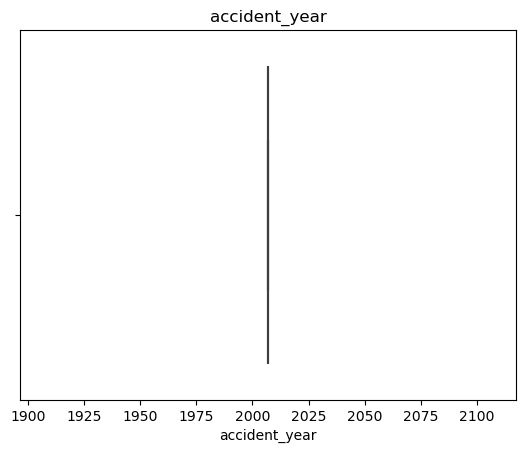

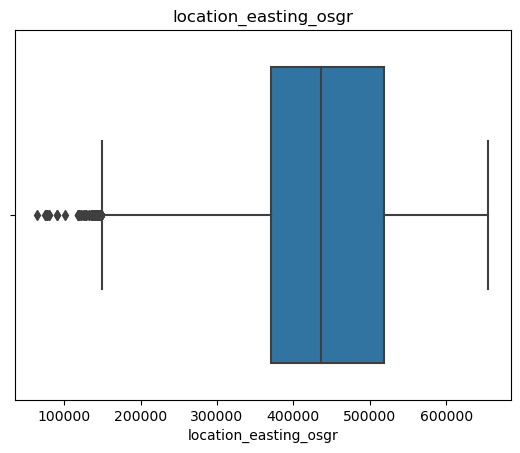

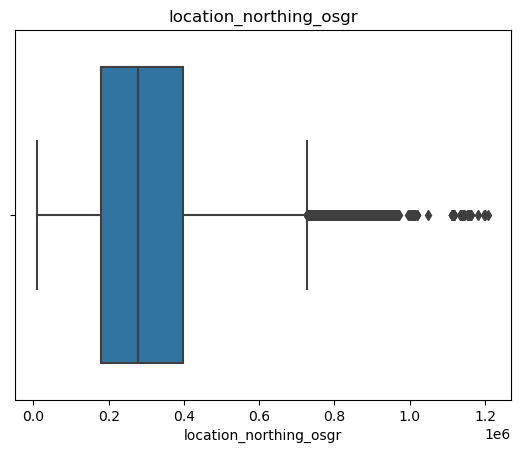

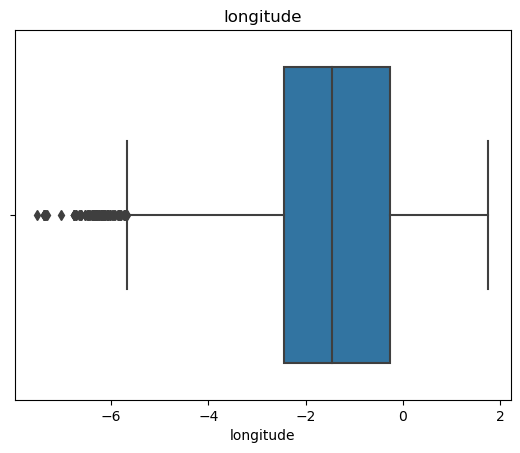

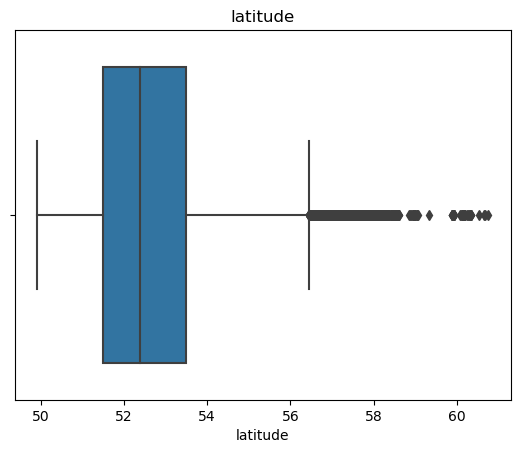

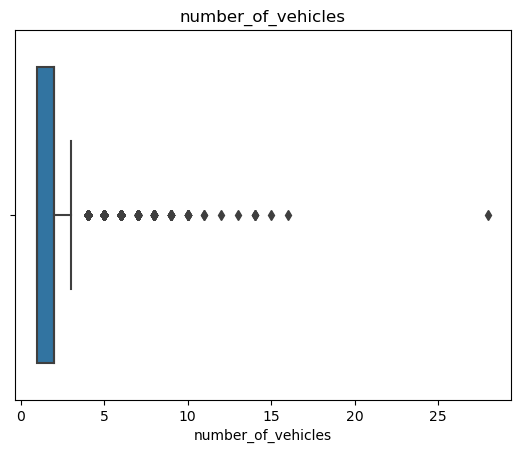

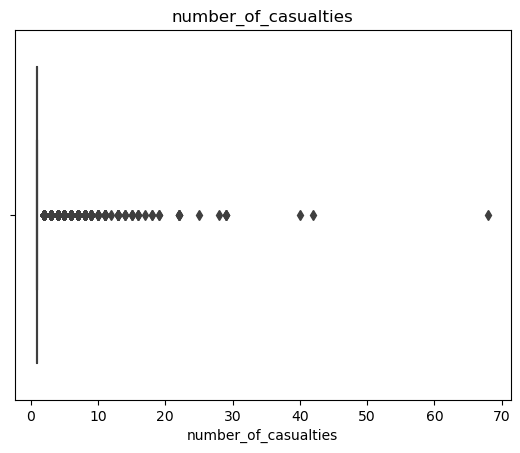

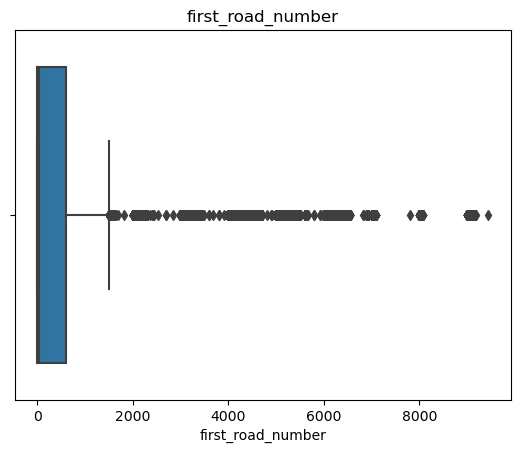

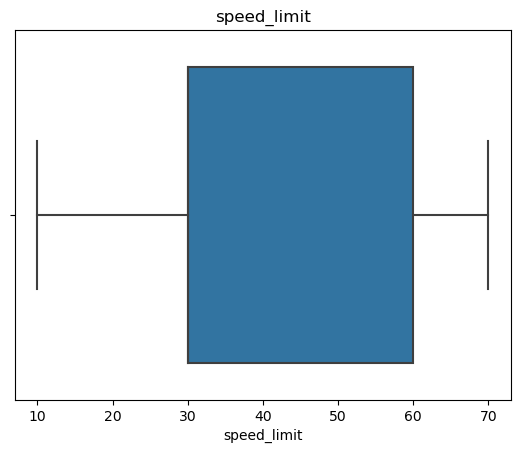

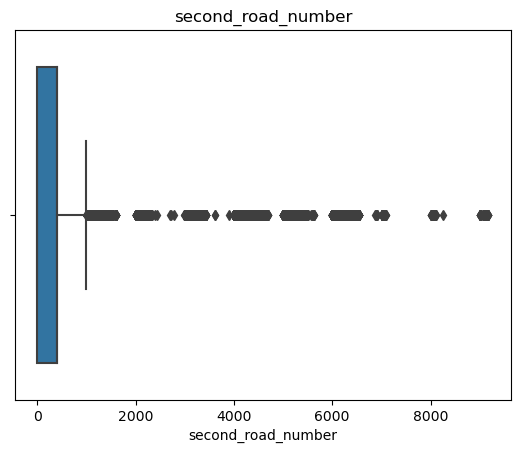

In [43]:
for i in range(len(NumericalColumns)):
    sns.boxplot(x=NumericalColumns[i], data=tempAcc)
    plt.title(NumericalColumns[i])
    plt.show()

## Handling outliers

In [44]:
def removal(x):
    if(x>max):
        x=max
    elif(x<min):
        x=min
    return x  

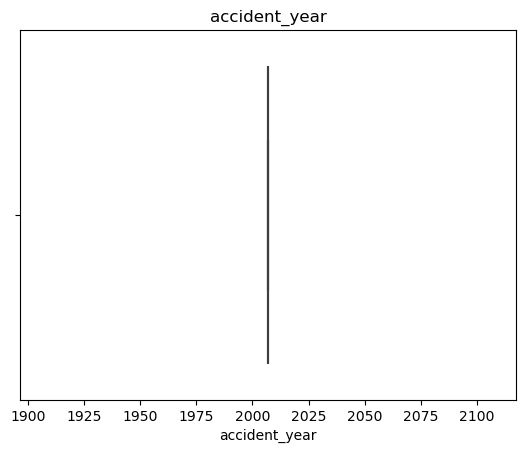

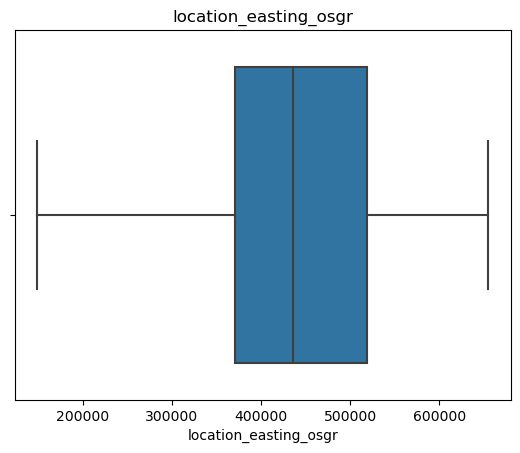

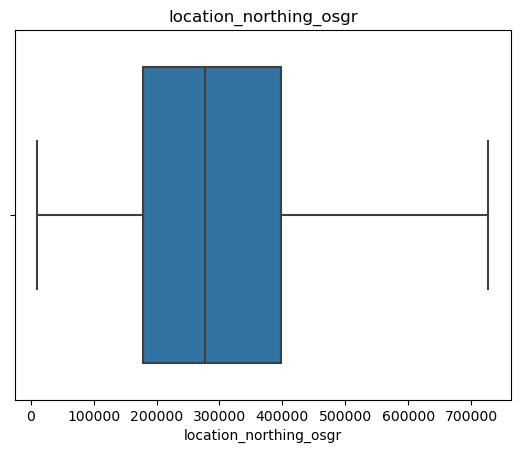

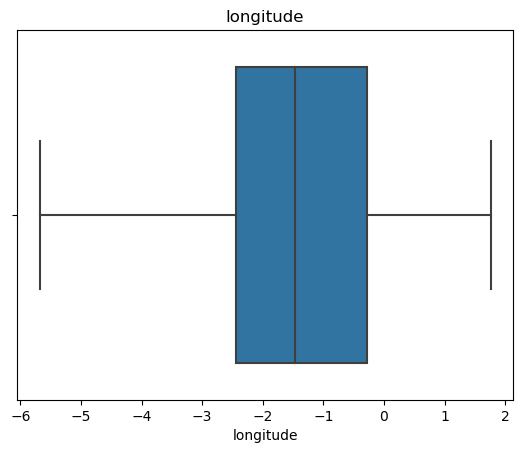

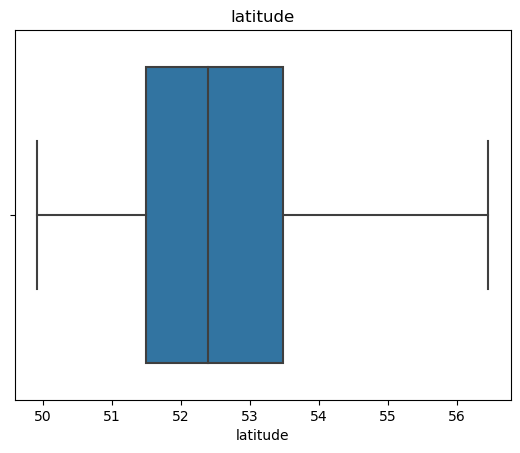

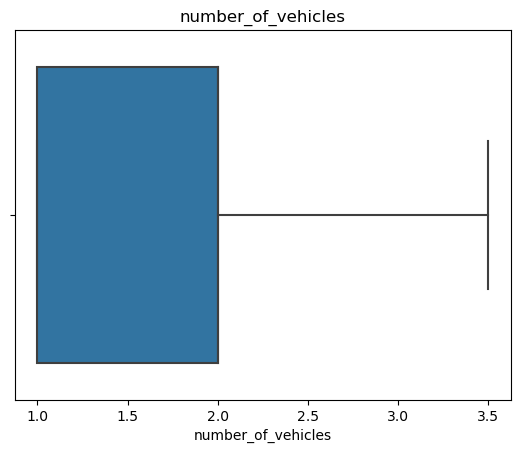

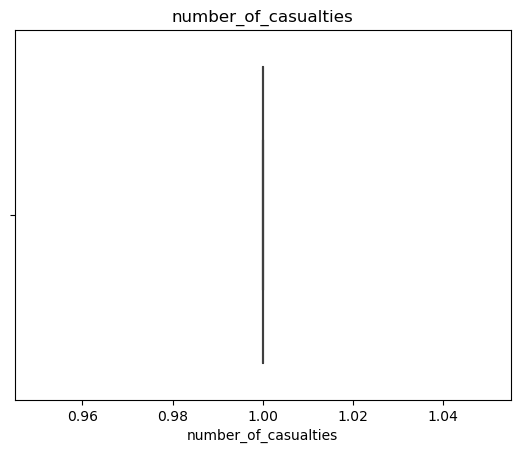

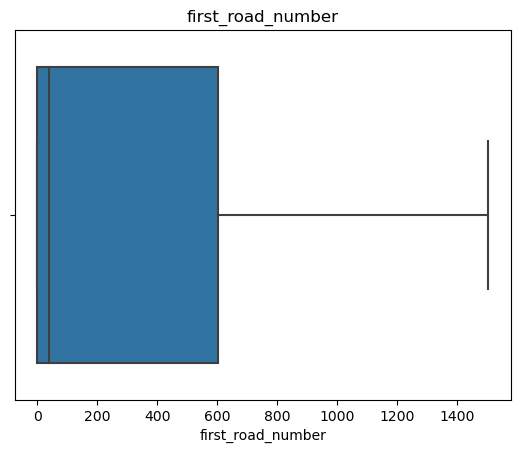

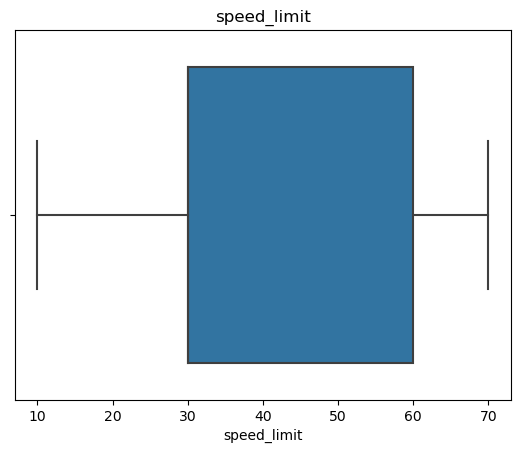

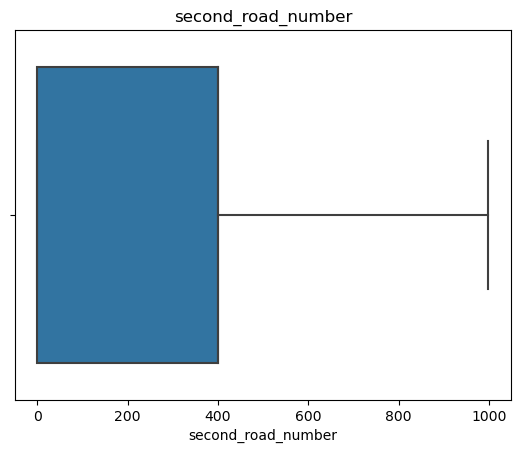

In [45]:
for i in range(len(NumericalColumns)):
    a = tempAcc[NumericalColumns[i]].quantile(0.25)
    b = tempAcc[NumericalColumns[i]].quantile(0.75)
    IQR = b-a
    min = a - (1.5*IQR)
    max = b + (1.5*IQR)
    tempAcc[NumericalColumns[i]] = tempAcc[NumericalColumns[i]].apply(removal) 
    sns.boxplot(x=NumericalColumns[i], data=tempAcc)
    plt.title(NumericalColumns[i])
    plt.show()

In [46]:
tempAcc['number_of_casualties'].value_counts()

1.0    182115
Name: number_of_casualties, dtype: int64

## Findings and conclusions

In [47]:
tempAcc['number_of_casualties'].isnull().sum()

0

# 4 - Data transformation

## 4.1 - Discretization

In [48]:
# tempAcc['date'] = pd.DatetimeIndex(tempAcc['date']).date
tempAcc['date']=pd.to_datetime(tempAcc['date'])
tempAcc['date']
pd.to_datetime(tempAcc['date'] , format='%d/%m/%Y')
x=pd.to_datetime(tempAcc['date'] , format='%d/%m/%Y')
tempAcc['Week Number']=[z.weekofyear for z in x ]

D:\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/08/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/08/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/09/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
D:\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31/10/2007' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent pars

## 4.11 - Findings and conclusions

In [49]:
tempAcc['number_of_casualties'].value_counts()

1.0    182115
Name: number_of_casualties, dtype: int64

In [50]:
tempAcc['number_of_casualties'].isnull().sum()

0

## 4.2 - Normalisation 

In [51]:
#preparing the features to normalize
NumericalColumns = tempAcc._get_numeric_data().columns.values.tolist()
NumericalColumns.remove('accident_year') #drop accident year because we we wont use it in calculations because its the year number
NumericalColumns.remove('longitude')
NumericalColumns.remove('latitude')
NumericalColumns.remove('number_of_casualties')



In [52]:
#min-max normalization for selected features range from 0-1
for column in NumericalColumns:
    tempAcc[column]=(tempAcc[column]-tempAcc[column].min())/(tempAcc[column].max()-tempAcc[column].min())

In [53]:
tempAcc

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Week Number
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200701BS64157,2007,01BS64157,0.741754,0.236534,-0.209082,51.506187,Metropolitan Police,Serious,0.4,1.0,2007-05-06,Tuesday,21:35,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,0.267110,Single carriageway,0.333333,T or staggered junction,Give way or uncontrolled,Unclassified,0.000000,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002871,0.333333
200701BS65737,2007,01BS65737,0.746672,0.234888,-0.173647,51.495029,Metropolitan Police,Serious,0.4,1.0,2007-02-07,Monday,18:41,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,1.000000,Single carriageway,0.333333,Crossroads,Auto traffic signal,C,0.000000,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002821,0.098039
200701BS66127,2007,01BS66127,0.741537,0.238320,-0.210215,51.517715,Metropolitan Police,Serious,0.8,1.0,2007-08-26,Sunday,00:50,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,0.026578,Single carriageway,0.666667,Not at junction or within 20 metres,Give way or uncontrolled,C,0.400000,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lighting unknown,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002878,0.647059
200701BS66128,2007,01BS66128,0.742682,0.234888,-0.202731,51.495478,Metropolitan Police,Serious,1.0,1.0,2007-08-16,Thursday,08:58,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,B,0.208638,Single carriageway,0.333333,T or staggered junction,Give way or uncontrolled,Unclassified,0.000000,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002817,0.627451
200701BS66837,2007,01BS66837,0.744124,0.233842,-0.192487,51.488576,Metropolitan Police,Slight,0.4,1.0,2007-03-09,Monday,21:17,Kensington and Chelsea,Kensington and Chelsea,Kensington and Chelsea,A,1.000000,Single carriageway,0.333333,Crossroads,Auto traffic signal,A,1.000000,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002894,0.176471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007984154707,2007,984154707,0.343294,0.775296,-3.210294,54.985289,Dumfries and Galloway,Slight,0.0,1.0,2007-12-20,Thursday,22:01,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,B,0.479070,Single carriageway,0.833333,Not at junction or within 20 metres,Give way or uncontrolled,B,0.400000,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Other,Frost or ice,None,None,Rural,Yes,Non-trunk,E01020573,0.980392
2007984154807,2007,984154807,0.345388,0.775087,-3.193693,54.984105,Dumfries and Galloway,Serious,0.0,1.0,2007-12-21,Friday,13:12,Dumfries and Galloway,Dumfries and Galloway,Dumfries & Galloway,B,0.479070,Single carriageway,0.500000,Not at junction or within 20 metres,Give way or uncontrolled,B,0.400000,None within 50 metres,No physical crossing facili

## 4.21 - Findings and conclusions

In [54]:
tempAcc['number_of_casualties'].isnull().sum()

0

## 4.3 - Adding more columns

In [55]:
# adding a new feature 'part of the day' = [Morning,Afternoon,Evening,Night]
def PartOfTheDay(dateTime):
    result =''
    if ((dateTime.time()>=datetime.time(5, 0))&(dateTime.time()<=datetime.time(12, 0))) :
        result='Morning'
    elif ((dateTime.time()>datetime.time(12, 0))&(dateTime.time()<=datetime.time(17, 0))) :
        result='Afternoon' 
    elif((dateTime.time()>datetime.time(17, 0))&(dateTime.time()<=datetime.time(21, 0))) :
        result='Evening' 
    else :
        result='Night'
    return result

time= pd.to_datetime(tempAcc['time'])
tempAcc['Part Of The Day']=[PartOfTheDay(x) for x in time]
tempAcc[['Part Of The Day','time']]

,Part Of The Day,time
accident_index,,
200701BS64157,Night,21:35
200701BS65737,Evening,18:41
200701BS66127,Night,00:50
200701BS66128,Morning,08:58
200701BS66837,Night,21:17
...,...,...
2007984154707,Night,22:01
2007984154807,Afternoon,13:12
2007984155407,Night,03:07


In [56]:
#new feature to determine if the day is a weekend or not
dates=pd.to_datetime(tempAcc['date'] , format='%d/%m/%Y')
tempAcc['Weekend']=[(True if x.weekday()>5 else False) for x in dates]

## Milestone 2 part

In [57]:
from geopy.geocoders import Nominatim
import ssl
from ssl import SSLError
geolocator = Nominatim(user_agent="http")


In [61]:
cities  = tempAcc['local_authority_district'].unique().tolist()
len(cities)

408

In [60]:
# This one took 3:38 min to run 
cities  = tempAcc['local_authority_district'].value_counts().tolist()
tempAcc['Country'] = tempAcc['local_authority_district']
for i in range(0,len(cities)):
    try:  
        if('and' in cities[i]):
            print(i)
            z = cities[i].split(' ')
            location = geolocator.geocode(z[0].strip(),timeout=None)
            if('대한민국' in location.raw['display_name'] or 'नेपाल' in location.raw['display_name']):
                location = geolocator.geocode(z[0].strip()+' District',timeout=None)
                x = location.raw['display_name'].split(',')
                y = x[len(x)-1].strip()
                print(y)
                tempAcc['Country'] = tempAcc['Country'].replace(cities[i],y)
            else:
                x = location.raw['display_name'].split(',')
                y = x[len(x)-1].strip()
                print(y)
                tempAcc['Country'] = tempAcc['Country'].replace(cities[i],y)
                
        else:
            location = geolocator.geocode(z[0].strip(),timeout=None)
            if('대한민국' in location.raw['display_name']):
                print(i)
                location = geolocator.geocode(z[0].strip()+' District',timeout=None)
                x = location.raw['display_name'].split(',')
                y = x[len(x)-1].strip()
                print(y)
                tempAcc['Country'] = tempAcc['Country'].replace(cities[i],y)
            elif(cities[i] == 'Arun'):
                print(i)
                location = geolocator.geocode(z[0].strip()+' District',timeout=None)
                x = location.raw['display_name'].split(',')
                y = x[len(x)-1].strip()
                print(y)
                tempAcc['Country'] = tempAcc['Country'].replace(cities[i],y)    
            else:  
                print(i)
              #  location = geolocator.geocode(cities[i],timeout=None)
                x = location.raw['display_name'].split(',')
                y = x[len(x)-1].strip()
                print(y)
                tempAcc['Country'] = tempAcc['Country'].replace(cities[i],y)
    except ssl.SSLError as err:
        handle_error(err)       

0
United Kingdom
1
United Kingdom
2
United Kingdom
3
United Kingdom
4
United Kingdom
5
United Kingdom
6
United Kingdom
7
United Kingdom
8
United Kingdom
9
United Kingdom
10
United Kingdom
11
United Kingdom
12
United Kingdom
13
United Kingdom
14
United Kingdom
15
United Kingdom
16
United Kingdom
17
United Kingdom
18
United Kingdom
19
United Kingdom
20
United Kingdom
21
United Kingdom
22
United Kingdom
23
United Kingdom
24
United Kingdom
25
United Kingdom
26
United Kingdom
27
United Kingdom
28
United Kingdom
29
United Kingdom
30
United Kingdom
31
United Kingdom
32
United Kingdom
33
United Kingdom
34
United Kingdom
35
India
36
India
37
India
38
India
39
United States
40
United States
41
United States
42
United States
43
United States
44
United States
45
United States
46
United States
47
United States
48
United States
49
United States
50
United States
51
United States
52
United States
53
United States
54
United States
55
United States
56
United States
57
United States
58
United States
59
U

In [61]:
tempAcc['Country'].value_counts()

United Kingdom     140416
United States       23517
Australia            9114
India                3807
Suomi / Finland      2337
Canada               2068
Liberia               856
Name: Country, dtype: int64

In [69]:
x = tempAcc[tempAcc["accident_severity"] == 'Serious']
res = x.Country.value_counts()
res
#How many serios accidents happened in the countries?

United Kingdom     18819
United States       2998
Australia           1376
India                425
Suomi / Finland      301
Canada               285
Liberia              118
Name: Country, dtype: int64

In [73]:
x = tempAcc[tempAcc["weather_conditions"] == 'Fine no high winds']
res = x.Country.value_counts()
res
#how many accidents happened in fine no high winds in the countries?

United Kingdom     114961
United States       18775
Australia            7002
India                3042
Suomi / Finland      1935
Canada               1586
Liberia               709
Name: Country, dtype: int64

## 4.42 - Encoding

In [74]:
def labelEncode(df,feature,decodingDf): #lable encoding +inserting the encoded data in a csv file
    cloneDf = df.copy()
    label_encoder = preprocessing.LabelEncoder()
    df[feature]= label_encoder.fit_transform(df[feature])
    for i in range(0,(len(cloneDf[feature].value_counts().keys().tolist()))):
        decodingDf.loc[len(decodingDf)]= [feature,cloneDf[feature].value_counts().keys().tolist()[i],df[feature].value_counts().keys().tolist()[i]]
    return df
def oneHot(df, feature,tempAcc): #one hot encoding
    print(feature)
    dummies = pd.get_dummies(df[feature],prefix =feature)
    df=df.drop(feature,axis=1)
  #  tempAcc = tempAcc.drop(feature,axis=1)
    result = pd.concat([df, dummies], axis=1)
    return result

tempAcc = df.copy()
beEncoded = tempAcc.select_dtypes(include=['object']).copy()
beEncoded=beEncoded.drop(['accident_reference','lsoa_of_accident_location'],axis=1)
decodingDf = pd.DataFrame(columns=['feature','before_encoding','after_encoding'])
for column in beEncoded:
    if(len(df[column].value_counts())>5): #we do lable encoding for all features selected to be encoded
        tempAcc = labelEncode(tempAcc,column,decodingDf)
    else:
        tempAcc = oneHot(tempAcc,column,tempAcc)

accident_severity
road_type
junction_control
pedestrian_crossing_human_control
light_conditions
road_surface_conditions
urban_or_rural_area
did_police_officer_attend_scene_of_accident
trunk_road_flag
Part Of The Day


## 4.5 - Csv file for lookup

In [62]:
#csv file to show the values before and after encoding
##decodingDf.to_csv('decodingDf.csv')#exporting to csv
##decodingDf.to_csv('decodingDf.parquet')#exporting to parquet

In [63]:
#csv file to show the replacement of missing data
##missingGf.to_csv('missingDf.csv')#exporting to csv
##missingGf.to_csv('missingDf.parquet')#exporting to parquet

## 5- Exporting the dataframe to a csv file or parquet

In [64]:
# need to install
# pip install fastparquet
# pip install pyarrow

In [65]:
# tempAcc.to_csv('new_2007_Accidents_UK.parquet') #exporting to csv
##tempAcc.to_parquet('new_2007_Accidents_UK.parquet')#exporting to parquet
# AccPar = pd.read_parquet('2007_Accidents_UK.parquet')


In [75]:
tempAcc.head(5)

,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,speed_limit,junction_detail,second_road_class,second_road_number,pedestrian_crossing_physical_facilities,weather_conditions,special_conditions_at_site,carriageway_hazards,lsoa_of_accident_location,Week Number,Weekend,Country,accident_severity_Fatal,accident_severity_Serious,accident_severity_Slight,road_type_Dual carriageway,road_type_One way street,road_type_Roundabout,road_type_Single carriageway,road_type_Slip road,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Not at junction or within 20 metres,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_None within 50 metres,light_conditions_Darkness - lighting unknown,light_conditions_Darkness - lights lit,light_conditions_Darkness - lights unlit,light_conditions_Darkness - no lighting,light_conditions_Daylight,road_surface_conditions_Dry,road_surface_conditions_Flood over 3cm. deep,road_surface_conditions_Frost or ice,road_surface_conditions_Snow,road_surface_conditions_Wet or damp,urban_or_rural_area_Rural,urban_or_rural_area_Unallocated,urban_or_rural_area_Urban,did_police_officer_attend_scene_of_accident_No,did_police_officer_attend_scene_of_accident_Yes,trunk_road_flag_Non-trunk,trunk_road_flag_Trunk (Roads managed by Highways England),Part Of The Day_Afternoon,Part Of The Day_Evening,Part Of The Day_Morning,Part Of The Day_Night
accident_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
200701BS64157,2007,01BS64157,0.741754,0.236534,-0.209082,51.506187,29,0.4,1.0,2007-05-06,5,1295,177,168,89,0,0.267110,0.333333,8,5,0.0,2,1,3,1,E01002871,0.333333,True,5,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1
200701BS65737,2007,01BS65737,0.746672,0.234888,-0.173647,51.495029,29,0.4,1.0,2007-02-07,1,1121,177,168,89,0,1.000000,0.333333,0,3,0.0,3,5,3,1,E01002821,0.098039,False,5,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0
200701BS66127,2007,01BS66127,0.741537,0.238320,-0.210215,51.517715,29,0.8,1.0,2007-08-26,3,50,177,168,89,0,0.026578,0.666667,3,3,0.4,2,1,3,1,E01002878,0.647059,True,5,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1
200701BS66128,2007,01BS66128,0.742682,0.234888,-0.202731,51.495478,29,1.0,1.0,2007-08-16,4,538,177,168,89,2,0.208638,0.333333,8,5,0.0,2,1,3,1,E01002817,0.627451,False,5,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0
200701BS66837,2007,01BS66837,0.744124,0.233842,-0.192487,51.488576,29,0.4,1.0,2007-03-09,1,1277,177,168,89,0,1.000000,0.333333,0,0,1.0,2,1,3,1,E01002894,0.176471,False,5,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1
